In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

**Importing the dataset**

In [31]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [32]:
df=pd.get_dummies(df,columns=["Gender"],drop_first=True)
df.drop(["User ID"],axis=1,inplace=True)
df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


([<matplotlib.patches.Wedge at 0x7f1ae10c5a60>,
 [Text(-0.9916006537889979, -0.476159787681858, '0'),
  Text(0.9916006983702906, 0.4761596948415019, '1')],
 [Text(-0.5408730838849078, -0.2597235205537407, '64.25%'),
  Text(0.5408731082019766, 0.25972346991354645, '35.75%')])

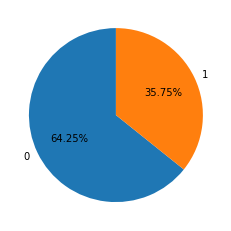

In [37]:
plt.pie(df["Purchased"].value_counts(),labels=df["Purchased"].unique(),startangle=90, autopct='%.2f%%')

**Splitting the dataset into the Training set and Test set**

In [38]:
x=df.drop(["Purchased"],axis=1)
y=df["Purchased"]

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

**Feature Scaling**

In [106]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

**Fitting K-NN to the Training set**

In [107]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [108]:
knn.score(x_test,y_test)

0.9333333333333333

**Predicting the Test set results**

In [96]:
y_pred=knn.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

**Making the Confusion Matrix**

<AxesSubplot:>

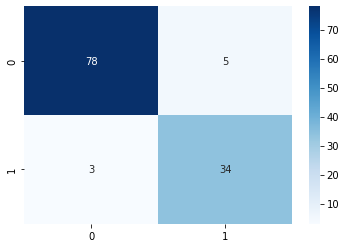

In [97]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap="Blues",annot=True)

In [98]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9333333333333333
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        83
           1       0.87      0.92      0.89        37

    accuracy                           0.93       120
   macro avg       0.92      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



In [99]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':[2,3,4,5,6,7,8,9,10,15,20]}
clf=GridSearchCV(estimator=knn,param_grid=param,cv=10)
clf.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]})

In [100]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [101]:
clf.best_params_

{'n_neighbors': 7}

In [102]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto')
knn.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [103]:
y_predi=knn.predict(x_test)

In [104]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_predi))
print(classification_report(y_test,y_predi))

0.9
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        83
           1       0.79      0.92      0.85        37

    accuracy                           0.90       120
   macro avg       0.88      0.91      0.89       120
weighted avg       0.91      0.90      0.90       120

